In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [ ]:
df = pd.read_csv('/content/final data.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


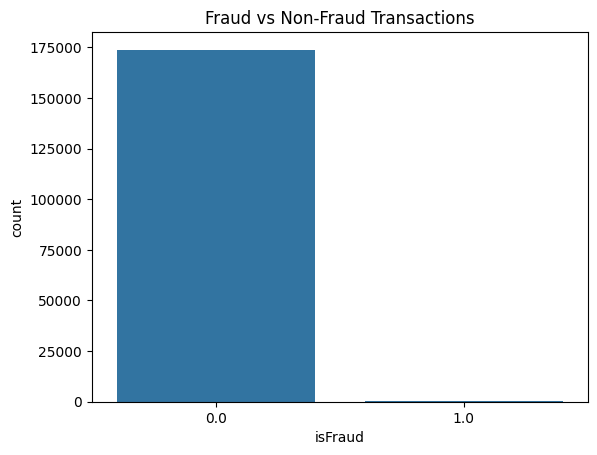

isFraud
0.0    173833
1.0       136
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="isFraud", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

print(df["isFraud"].value_counts())


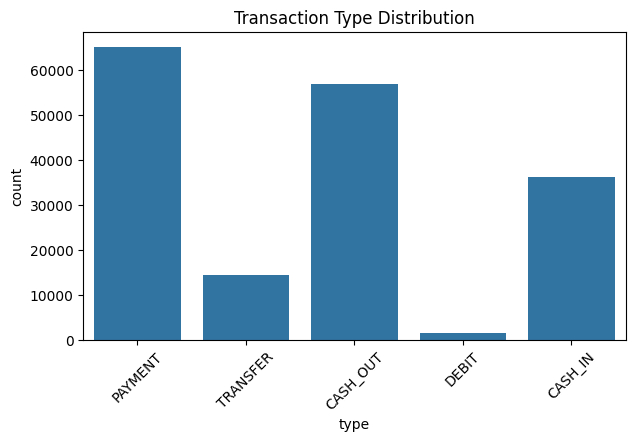

type
PAYMENT     65105
CASH_OUT    56793
CASH_IN     36063
TRANSFER    14476
DEBIT        1533
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="type", data=df)
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()

print(df["type"].value_counts())


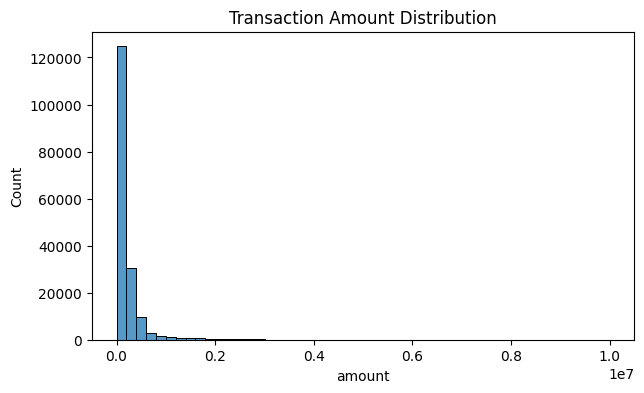

count    1.739690e+05
mean     1.798562e+05
std      3.345058e+05
min      3.200000e-01
25%      1.157790e+04
50%      6.485077e+04
75%      2.263091e+05
max      1.000000e+07
Name: amount, dtype: float64


In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

print(df["amount"].describe())


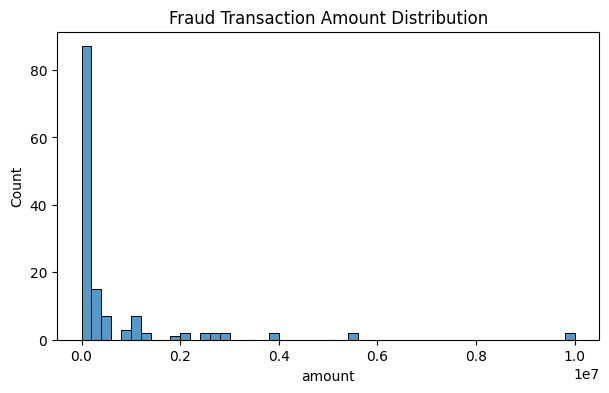

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df["isFraud"]==1]["amount"], bins=50)
plt.title("Fraud Transaction Amount Distribution")
plt.show()


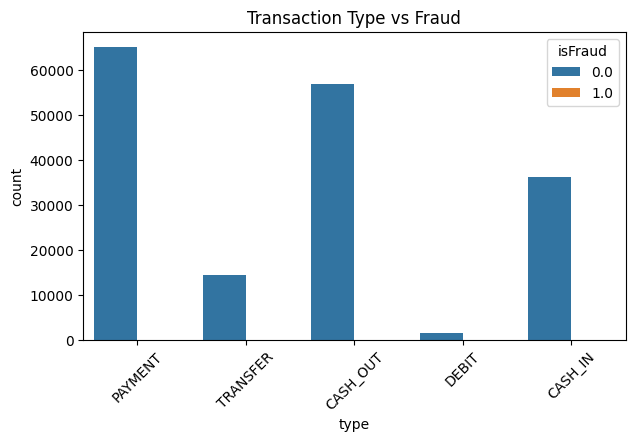

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Transaction Type vs Fraud")
plt.xticks(rotation=45)
plt.show()


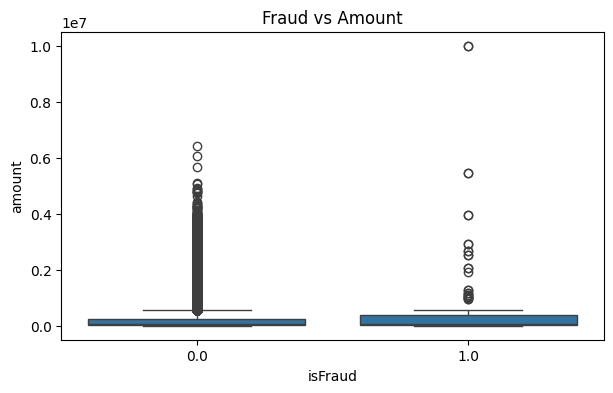

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Fraud vs Amount")
plt.show()


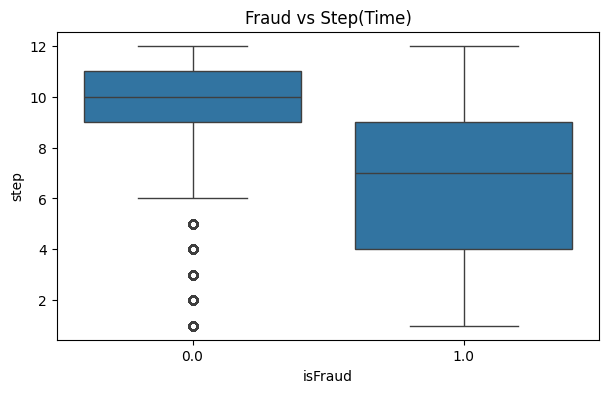

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="isFraud", y="step", data=df)
plt.title("Fraud vs Step(Time)")
plt.show()


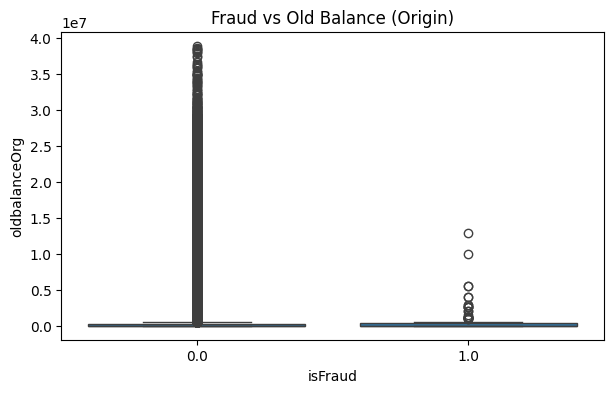

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="isFraud", y="oldbalanceOrg", data=df)
plt.title("Fraud vs Old Balance (Origin)")
plt.show()


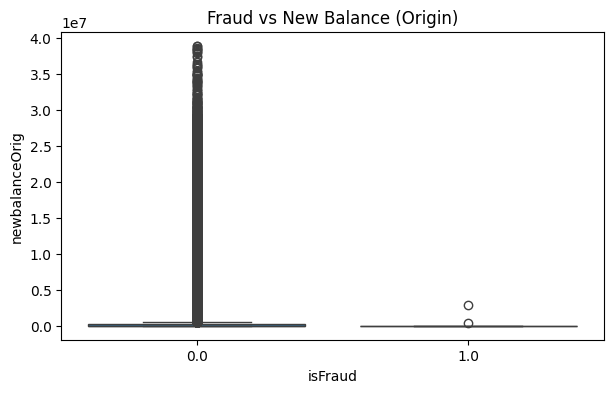

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="isFraud", y="newbalanceOrig", data=df)
plt.title("Fraud vs New Balance (Origin)")
plt.show()


In [ ]:
df.describe(include= 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,173970.000000,173970,1.739690e+05,173969,1.739690e+05,1.739690e+05,173969,1.739690e+05,1.739690e+05,173969.000000,173969.0
unique,NaN,5,NaN,173966,NaN,NaN,84319,NaN,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C260230637,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,65105,NaN,2,NaN,NaN,81,NaN,NaN,NaN,NaN
mean,9.673674,NaN,1.798562e+05,NaN,9.046040e+05,9.221434e+05,NaN,9.252180e+05,1.186103e+06,0.000782,0.0
std,1.990281,NaN,3.345058e+05,NaN,2.842910e+06,2.880169e+06,NaN,2.380445e+06,2.684573e+06,0.027949,0.0
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,NaN,1.157790e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,NaN,6.485077e+04,NaN,1.989700e+04,0.000000e+00,NaN,4.081200e+04,1.120032e+05,0.000000,0.0
75%,11.000000,NaN,2.263091e+05,NaN,1.964789e+05,2.300230e+05,NaN,7.202704e+05,1.154778e+06,0.000000,0.0


In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


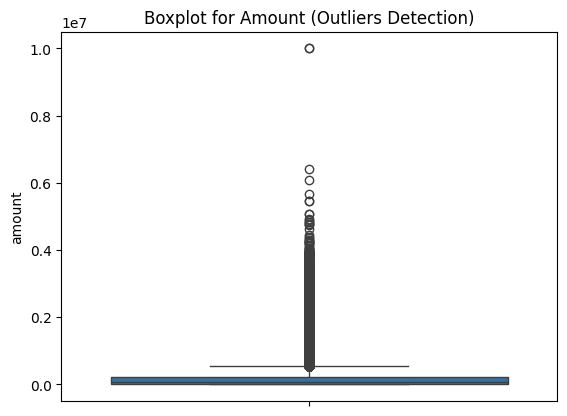

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df["amount"])
plt.title("Boxplot for Amount (Outliers Detection)")
plt.show()


In [ ]:
from scipy import stats
import numpy as np

print(stats.mode(df["amount"]))
print(np.mean(df["amount"]))

q1 = np.quantile(df["amount"], 0.25)
q3 = np.quantile(df["amount"], 0.75)

IQR = q3 - q1

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print("q1 :", q1)
print("q3 :", q3)
print("IQR :", IQR)
print("Upper Bound :", upper_bound)
print("Lower Bound :", lower_bound)

print("Skewed data :", len(df[df["amount"] > upper_bound]))
print("Skewed data :", len(df[df["amount"] < lower_bound]))


ModeResult(mode=np.float64(2367.99), count=np.int64(3))
179856.15057199847
q1 : nan
q3 : nan
IQR : nan
Upper Bound : nan
Lower Bound : nan
Skewed data : 0
Skewed data : 0


In [ ]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.distplot(feature)

    plt.subplot(1,2,2)
    stats.probplot(feature, dist="norm", plot=plt)

    plt.show()


/tmp/ipython-input-2141087699.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


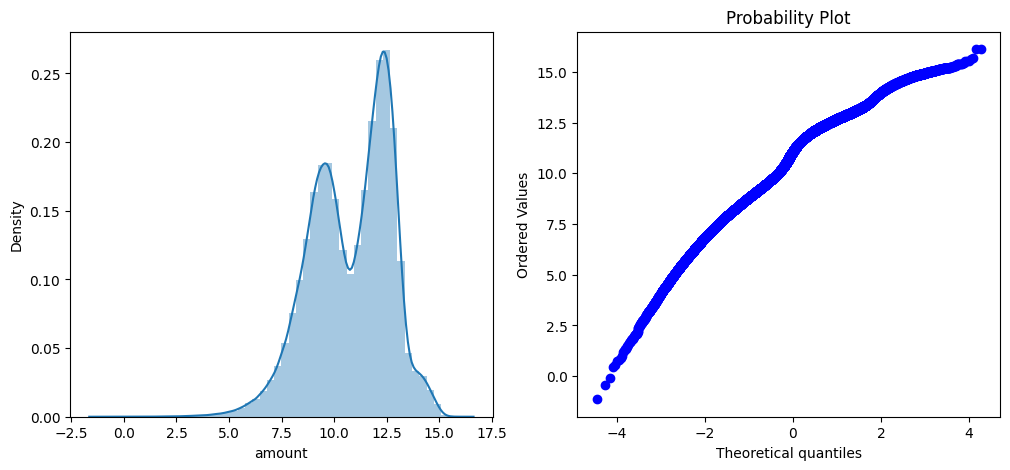

In [ ]:
transformationPlot(np.log(df["amount"]))

df["amount"] = np.log(df["amount"])


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["type"] = le.fit_transform(df["type"])

df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9.194174,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,3,7.530630,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,4,5.198497,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,1,5.198497,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,3,9.364617,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
print(df["isFraud"].isna().sum())


1


In [ ]:
df = df.dropna(subset=["isFraud"])


In [ ]:
df["isFraud"] = df["isFraud"].astype(int)


In [ ]:
df = df.drop(["nameOrig", "nameDest"], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

# X = Features (all columns except target)
X = df.drop("isFraud", axis=1)

# y = Target column
y = df["isFraud"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (139175, 8)
X_test shape : (34794, 8)
y_train shape: (139175,)
y_test shape : (34794,)


Random Forest Accuracy: 0.999482669425763

Confusion Matrix:
 [[34767     0]
 [   18     9]]


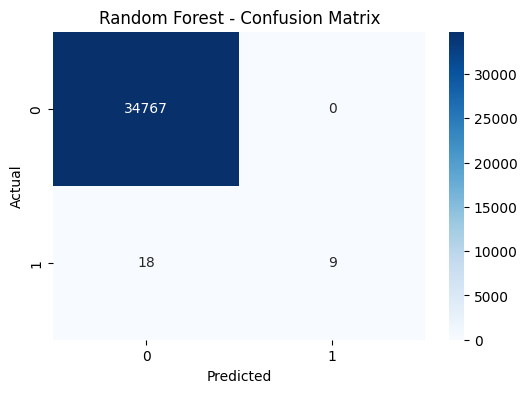


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34767
           1       1.00      0.33      0.50        27

    accuracy                           1.00     34794
   macro avg       1.00      0.67      0.75     34794
weighted avg       1.00      1.00      1.00     34794



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# 2) Train the model
rf_model.fit(X_train, y_train)

# 3) Predict on test data
y_pred_rf = rf_model.predict(X_test)

# 4) Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# 5) Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)

# 6) Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.9993102259010174

Confusion Matrix:
 [[34758     9]
 [   15    12]]


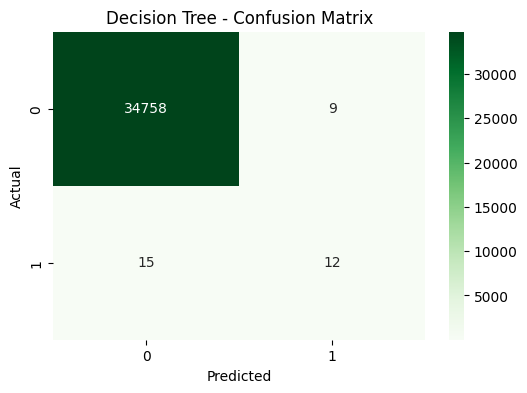


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34767
           1       0.57      0.44      0.50        27

    accuracy                           1.00     34794
   macro avg       0.79      0.72      0.75     34794
weighted avg       1.00      1.00      1.00     34794



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',   # or 'entropy'
    max_depth=None,     # you can limit depth like max_depth=5 to avoid overfitting
    random_state=42
)

# 2) Train the model
dt_model.fit(X_train, y_train)

# 3) Predict on test data
y_pred_dt = dt_model.predict(X_test)

# 4) Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# 5) Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm_dt)

# 6) Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Extra Trees Accuracy: 0.9993102259010174

Confusion Matrix:
 [[34766     1]
 [   23     4]]


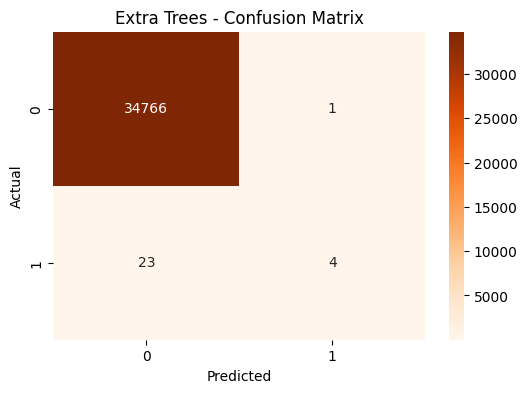


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34767
           1       0.80      0.15      0.25        27

    accuracy                           1.00     34794
   macro avg       0.90      0.57      0.62     34794
weighted avg       1.00      1.00      1.00     34794



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create Extra Trees model
et_model = ExtraTreesClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    max_features='sqrt',  # square root of features for split
    n_jobs=-1             # use all cores
)

# 2) Train the model
et_model.fit(X_train, y_train)

# 3) Predict on test data
y_pred_et = et_model.predict(X_test)

# 4) Accuracy
et_accuracy = accuracy_score(y_test, y_pred_et)
print("Extra Trees Accuracy:", et_accuracy)

# 5) Confusion Matrix
cm_et = confusion_matrix(y_test, y_pred_et)
print("\nConfusion Matrix:\n", cm_et)

# 6) Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="Oranges")
plt.title("Extra Trees - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_et))


SVM Accuracy: 0.9992240041386445

Confusion Matrix:
 [[34767     0]
 [   27     0]]


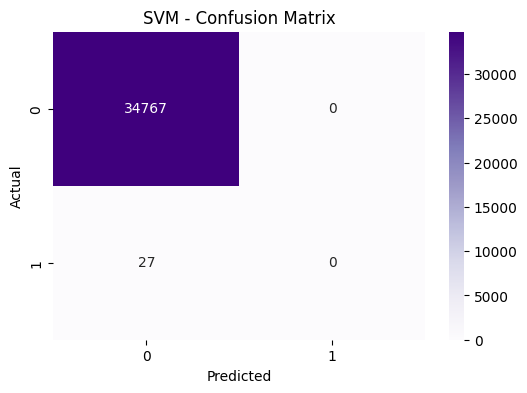


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34767
           1       0.00      0.00      0.00        27

    accuracy                           1.00     34794
   macro avg       0.50      0.50      0.50     34794
weighted avg       1.00      1.00      1.00     34794



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2) Create SVM model
svm_model = SVC(
    kernel='rbf',      # radial basis function kernel
    C=1.0,             # regularization parameter
    gamma='scale',     # kernel coefficient
    random_state=42
)

# 3) Train the model
svm_model.fit(X_train_scaled, y_train)

# 4) Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# 5) Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# 6) Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", cm_svm)

# 7) Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:43:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9995976317755935

Confusion Matrix:
 [[34766     1]
 [   13    14]]


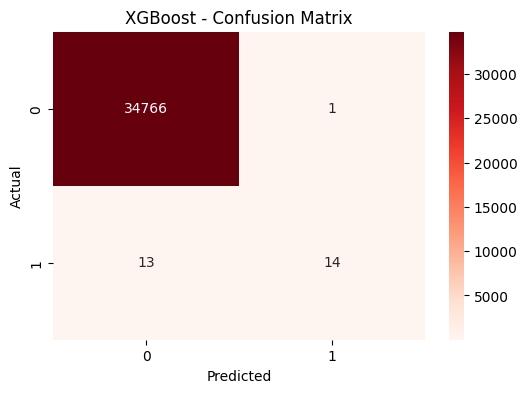


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34767
           1       0.93      0.52      0.67        27

    accuracy                           1.00     34794
   macro avg       0.97      0.76      0.83     34794
weighted avg       1.00      1.00      1.00     34794



In [ ]:
# Install XGBoost if not installed
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=5,           # max depth of tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # avoid warning
)

# 2) Train the model
xgb_model.fit(X_train, y_train)

# 3) Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# 4) Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)

# 5) Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm_xgb)

# 6) Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Reds")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7) Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))



Model Comparison (Tree-based + SVM/XGBoost):

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.999310   0.571429  0.444444  0.500000
1  Random Forest  0.999483   1.000000  0.333333  0.500000
2    Extra Trees  0.999310   0.800000  0.148148  0.250000
3            SVM  0.999224   0.000000  0.000000  0.000000
4        XGBoost  0.999598   0.933333  0.518519  0.666667


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


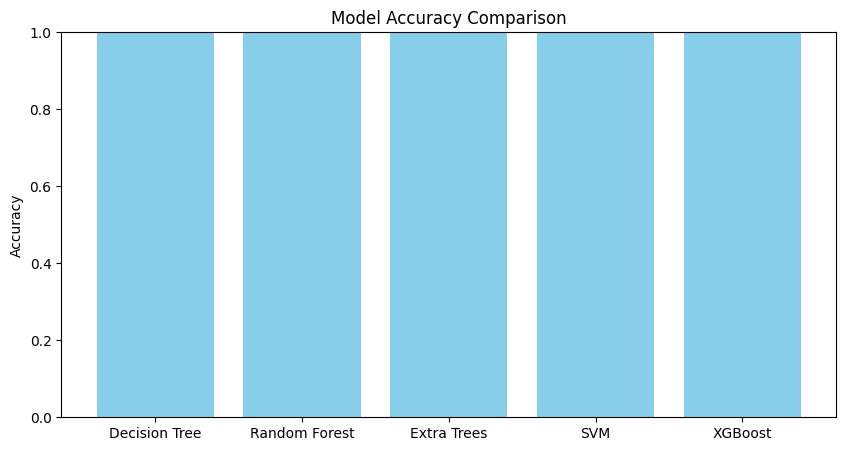

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Models and predictions
models = ["Decision Tree", "Random Forest", "Extra Trees", "SVM", "XGBoost"]
predictions = [y_pred_dt, y_pred_rf, y_pred_et, y_pred_svm, y_pred_xgb]

# Metrics
accuracy = []
precision = []
recall = []
f1 = []

for y_pred in predictions:
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Create DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

print("\nModel Comparison (Tree-based + SVM/XGBoost):\n")
print(comparison_df)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [ ]:
import pickle

# Example: Saving Random Forest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [ ]:
# Load the model
with open("random_forest_model.pkl", "rb") as f:
    loaded_rf_model = pickle.load(f)

# Predict using the loaded model
y_pred_loaded = loaded_rf_model.predict(X_test)
print("Predictions using loaded model:", y_pred_loaded[:10])


Predictions using loaded model: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Load scaler
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

X_test_scaled = loaded_scaler.transform(X_test)


In [ ]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
